# Predicting Customer Churn to Increase Retention

***

## Table of Contents 

1. Dataset
<br>1.1 Data Overview
<br>1.2 Feature Overview
2. Data Cleaning
3. EDA and Summary Statistics
***

## Introduction 

Acquiring a new customer can be five times more expensive than retaining an existing one! Such a staggering proportion emphasizes the importance of catering to an existing customer’s satisfaction and longevity to generate sales at a high ROI. In fact, increasing customer retention rates by as little as 5% can increase profits by 25 to 95%, according to a study done by Frederick Reichheld of Bain & Company. A key metric in evaluating customer retention is the customer churn rate.

In the telecommunications industry, the churn rate measures the percentage of service subscribers who discontinue their subscriptions over a particular period. Many providers in the industry offer similar services and generate the bulk of their revenue through subscription costs; therefore, the churn rate is a key metric to minimize to sustain subscription revenues.

The varying Internet, television, and telephone service providers available to the public make it easy and desirable for customers to try different services to see which works best for them. Some providers do not even require customers to lock into long-term contracts and give them the flexibility to change providers frequently. Service providers are able to provide more value to customers via short-term contracts by retaining their existing customers and minimizing their churn. 


## 1. Dataset

### 1.1 Data Overview

The dataset used in this project is available on Kaggle, [here.](https://www.kaggle.com/blastchar/telco-customer-churn)

Each row represents a customer and each column contains customers' attributes.
<br>**The dataset includes information about:**
* Demographic info about customers – gender, age, and if they have partners and dependents
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – tenure, contract, payment method, paperless billing, monthly charges, and total charges
* Customers who left within the last month - the column is called Churn

### 1.2 Feature Overview

##### A. Demographics
**1. gender** : Sex (categorical: "Male", "Female")
<br>**2. SeniorCitizen** : Is senior citizen (categorical: 0=no, 1=yes)
<br>**3. Partner** : Does customer have a partner (categorical: 0=no, 1=yes)
<br>**4. Dependents** : Does customer have dependents (categorical: 0=no, 1=yes)
##### B. Services
**5. PhoneService** : Has phone service (categorical: "Yes", "No")
<br>**6. MultipleLines** : Has multiple lines (categorical: "Yes", "No", "No phone service")
<br>**7. InternetService** : Type of Internet service (categorical: "DSL", "Fiber optic", "No")
<br>**8. OnlineSecurity** : Has malware protection (categorical: "Yes", "No", "No internet service")
<br>**9. OnlineBackup** : Has digital backup service (categorical: "Yes", "No", "No internet service")
<br>**10. DeviceProtection** : Has device protection plan (categorical: "Yes", "No", "No internet service")
<br>**11. TechSupport** : Has contacted tech support (categorical: "Yes", "No", "No internet service")
<br>**12. StreamingTV** : Has TV streaming service (categorical: "Yes", "No", "No internet service")
<br>**13. StreamingMovies** : Has movie streaming service (categorical: "Yes", "No", "No internet service")
##### C. Account Information
**14. customerID** : customer identification number (categorical)
<br>**15. tenure** : Number of months the consumer has been a customer (numeric: 1,2,3,...72)
<br>**16. Contract** : Type of contact (categorical: "Month-to-month", "One year", "Two year")
<br>**17. PaperlessBilling** : Customer is billed via email (categorical: "Yes", "No")
<br>**18. PaymentMethod** : Method of payment on file (categorical: "Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)")
<br>**19. MonthlyCharges** : Monthly fee (numeric)
<br>**20. TotalCharges** : Sum of all fees (numeric)
##### D. Target Variable
**21. Churn** : Customers who left within the last month (categorical: "Yes", "No")

## 2. Data Cleaning

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
# Identify feature data types and data set shape. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# Identify number of missing values in the data set.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

At first glance, all features appear to have non-null entries; however, there may still be missing values encoded in different ways, such as blank spaces. Let's take another glance at the unique values of the features.

In [7]:
# Display first 5 records in the data set. 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Convert SeniorCitizen from an int to a string, to keep the data consistent.
df.SeniorCitizen = df.SeniorCitizen.replace({1:'Yes', 0:'No'})

In [10]:
# Convert the Total Charges column from a string to a float
df.TotalCharges = df.TotalCharges.astype(float)

In [8]:
# Replace any whitespace values with NaN
df = df.replace(r'\s+$', np.nan, regex=True)

# Print number of null values 
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


The TotalCharges column contains 11 missing/null values. These records containing null values only comprise 0.16% of the total data and will be dropped.

In [9]:
# Drop missing values and print shape 
df = df.dropna()
print("Number of missing values: ", df.isnull().sum().values.sum())
print("Number of records: ", df.shape[0])

Number of missing values:  0
Number of records:  7032


There are now 11 less records and no missing values in the data. 

In [6]:
# Display unique values as reference for mapping strings to integers.
for col in df:
    print(col)
    print(df[col].unique(), '\n')

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank tran

For the features relating to Services, we replace the "No internet service" value for "No", because it is redundant: the InternetService feature let's us know whether or not the customer had Internet service. 

In [11]:
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for x in internet_cols:
    df[x] = df[x].replace({'No internet service' : 'No'})

In [13]:
# Map strings to integers
# df.gender = df.gender.map({'Female' : 'F', 'Male' : 'M'})
# df.Partner = df.Partner.map({'No' : 0, 'Yes' : 1})
# df.Dependents = df.Dependents.map({'No' : 0, 'Yes' : 1})
# df.PhoneService = df.PhoneService.map({'No' : 0, 'Yes' : 1})
# df.MultipleLines = df.MultipleLines.map({'No' : 0, 'Yes' : 1, 'No phone service' : 2})
# df.InternetService = df.InternetService.map({'No' : 0, 'DSL' : 1, 'Fiber optic' : 2})
# df.OnlineSecurity = df.OnlineSecurity.map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})
# df.OnlineBackup = df.OnlineBackup.map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})
# df.DeviceProtection = df.DeviceProtection.map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})
# df.TechSupport = df.TechSupport.map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})
# df.StreamingTV = df.StreamingTV.map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})
# df.StreamingMovies = df.StreamingMovies.map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})
# df.Contract = df.Contract.map({'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2})
# df.PaperlessBilling = df.PaperlessBilling.map({'No' : 0, 'Yes' : 1})
# df.PaymentMethod = df.PaymentMethod.map({'Electronic check' : 0, 'Mailed check' : 1, 'Bank transfer (automatic)' : 2, 'Credit card (automatic)' : 3})
# df.Churn = df.Churn.map({'No' : 0, 'Yes' : 1})

## 3. EDA and Summary Statistics

In [14]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

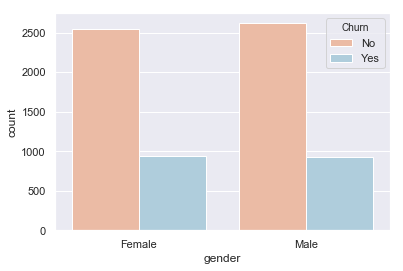

In [17]:
plt.figure()
sns.set()
sns.countplot(x='gender', hue='Churn', data=df, palette='RdBu')
plt.show()